<a href="https://colab.research.google.com/github/annisasuciati/TA-DTI/blob/main/eda_w_shap_missing_migrants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Migrants Dataset

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

# Load and Clean Dataset

In [110]:
data = pd.read_csv('https://raw.githubusercontent.com/annisasuciati/TA-DTI/main/MissingMigrantsProject.csv', encoding='latin-1') # load data from csv
data.head() #first 5 rows

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,source,reliability,lat,lon
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,IOM Greece,Verified,36.89150,27.287700
1,3,Fell from train,Central America & Mexico,Honduras,NaN,1.0,Central America incl. Mexico,03/11/2015,La Jornada,Partially Verified,15.95640,-93.663100
2,4,Presumed drowning,Middle East,NaN,NaN,1.0,Mediterranean,03/11/2015,Hellenic Coast Guard,Verified,36.50439,27.363253
3,6,Drowning,MENA,NaN,6.0,4.0,Mediterranean,01/11/2015,Reuters,Partially Verified,37.28560,27.086600
4,7,Vehicle accident,South East Asia,Cambodia,NaN,4.0,Southeast Asia,01/11/2015,Phnom Penh Post,Partially Verified,13.36110,100.985000


In [111]:
data.sample(5)

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,source,reliability,lat,lon
62,76,Vehicle accident,NaN,NaN,NaN,1.0,Europe,05/10/2015,Independent.mk,Unverified,42.309200,21.649900
513,18565,Drowning,MENA,NaN,NaN,1.0,Mediterranean,14/01/2016,Hellenic Coast Guard,Verified,37.287778,27.085277
1414,134678,Shot_or_Stabbed,Horn of Africa (P),NaN,NaN,6.0,North Africa,17/03/2016,Regional Mixed Migration Secretariat,NaN,14.016113,35.378723
1144,112186,Unknown (skeletal remains),Central America,NaN,NaN,1.0,U.S./Mexico Border,20/09/2016,Pima County Office of the Medical Examiner,Verified,31.961907,-112.013069
2201,168751,Unknown (skeletal remains),Central America & Mexico,NaN,NaN,1.0,U.S./Mexico Border,20/03/2017,Pima County Office of the Medical Examiner,Verified,31.739103,-112.047401


In [112]:
data.columns

Index(['id', 'cause_of_death', 'region_origin', 'affected_nationality',
       'missing', 'dead', 'incident_region', 'date', 'source', 'reliability',
       'lat', 'lon'],
      dtype='object')

In [113]:
#Renaming data columns for better understanding of the fields
data.rename(columns={'id': 'ID',
                      'cause_of_death': 'CauseOfDeath',
                      'region_origin': 'RegionOfOrigin',
                      'affected_nationality': 'Nationality',
                      'missing': 'MissingNumberOfPeople',
                      'dead': 'DeadNumberOfPeople',
                      'incident_region': 'IncidentRegion',
                      'date': 'Date',
                      'source': 'Source',
                      'reliability': 'Reliability',
                      'lat': 'Latitud',
                      'lon': 'Longitud'}, inplace=True)

In [114]:
data.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,IOM Greece,Verified,36.89150,27.287700
1,3,Fell from train,Central America & Mexico,Honduras,NaN,1.0,Central America incl. Mexico,03/11/2015,La Jornada,Partially Verified,15.95640,-93.663100
2,4,Presumed drowning,Middle East,NaN,NaN,1.0,Mediterranean,03/11/2015,Hellenic Coast Guard,Verified,36.50439,27.363253
3,6,Drowning,MENA,NaN,6.0,4.0,Mediterranean,01/11/2015,Reuters,Partially Verified,37.28560,27.086600
4,7,Vehicle accident,South East Asia,Cambodia,NaN,4.0,Southeast Asia,01/11/2015,Phnom Penh Post,Partially Verified,13.36110,100.985000


In [115]:
#Descriptive or summary statistics of numeric columns
data.describe()

,ID,MissingNumberOfPeople,DeadNumberOfPeople,Latitud,Longitud
count,2420.00000,271.000000,2318.000000,2416.000000,2416.000000
mean,95926.26405,39.656827,4.729077,26.901380,-13.995935
std,62191.92252,84.130918,20.539717,11.518420,61.694081
min,1.00000,0.000000,0.000000,-26.224531,-117.070560
25%,28571.25000,3.000000,1.000000,19.535706,-97.035666
50%,121178.00000,10.000000,1.000000,29.348889,14.471100
75%,144678.25000,33.000000,3.000000,34.041291,32.010437
max,184750.00000,750.000000,750.000000,66.967199,116.224928


In [116]:
#Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2420 non-null   int64  
 1   CauseOfDeath           2217 non-null   object 
 2   RegionOfOrigin         1977 non-null   object 
 3   Nationality            845 non-null    object 
 4   MissingNumberOfPeople  271 non-null    float64
 5   DeadNumberOfPeople     2318 non-null   float64
 6   IncidentRegion         2410 non-null   object 
 7   Date                   2411 non-null   object 
 8   Source                 2413 non-null   object 
 9   Reliability            2096 non-null   object 
 10  Latitud                2416 non-null   float64
 11  Longitud               2416 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 227.0+ KB


In [117]:
#Returns the dimensions of the array
#Rows & Columns
data.shape

(2420, 12)

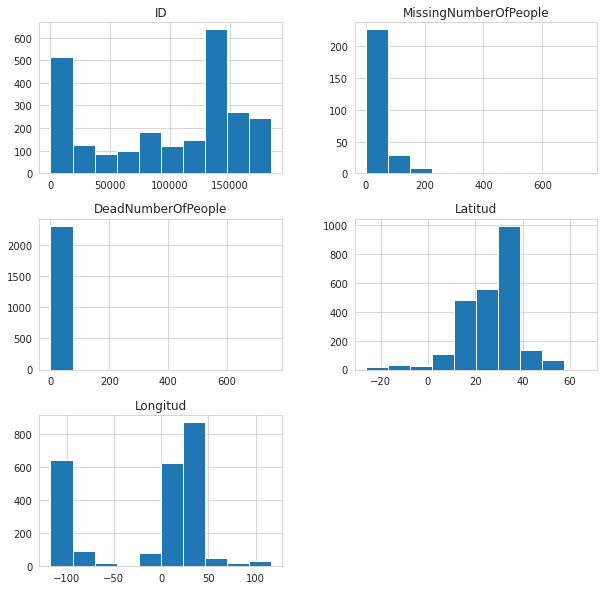

In [118]:
#Representation of the distribution of data
data.hist(figsize=[10,10]);

In [119]:
#Drop rows that have min of 9 NAN values
data.dropna(thresh=9,inplace=True)

In [120]:
#Returns the dimensions of the array
#Rows & Columns
data.shape

(2341, 12)

In [121]:
#Percentage of NAN Values
data.isna().mean().round(4) * 100

ID                        0.00
CauseOfDeath              5.43
RegionOfOrigin           15.81
Nationality              64.03
MissingNumberOfPeople    88.68
DeadNumberOfPeople        3.93
IncidentRegion            0.04
Date                      0.00
Source                    0.04
Reliability              13.41
Latitud                   0.00
Longitud                  0.00
dtype: float64

In [122]:
#Number of NAN Values
data.isna().sum()

ID                          0
CauseOfDeath              127
RegionOfOrigin            370
Nationality              1499
MissingNumberOfPeople    2076
DeadNumberOfPeople         92
IncidentRegion              1
Date                        0
Source                      1
Reliability               314
Latitud                     0
Longitud                    0
dtype: int64

### Cleaning per column 

1. ID

In [123]:
#Checking the uniqueness in the columns
len(data['ID'].unique())                  

2341

**Note:**

- ID column, no change needs to be perfomed as It doesn't contain any missing value and every incident have an identifier.

2. Cause Of Death

In [124]:
#Checking the uniqueness in the columns
len(data['CauseOfDeath'].unique())

290

In [125]:
data['CauseOfDeath'].isna().sum()

127

In [126]:
#Unknown instead of NAN as cause of Death
data['CauseOfDeath'].fillna('Unknown', inplace = True) 

In [127]:
data['CauseOfDeath'].head()

0    Presumed drowning
1      Fell from train
2    Presumed drowning
3             Drowning
4     Vehicle accident
Name: CauseOfDeath, dtype: object

In [128]:
#Outline different types of Cause of Death
set(data['CauseOfDeath'])

{'AH1N1 influenza virus, while stuck at border',
 'Asphyxiation',
 'Asphyxiation (Silica sand inhalation)',
 'Asphyxiation and crushing',
 'Assaulted by smugglers',
 'Attacked by hippopotamus',
 'Beat-up and killed',
 'Beat-up and thrown into river',
 'Beaten to death on train',
 'Beating/shot by traffickers',
 'Blunt force head trauma',
 'Blunt force injuries',
 'Boat fire',
 'Bronchial aspiration',
 'Bronchopneumonia',
 'Burned to death hiding in truck',
 'Burns and Suffocation',
 'Burns from cooking gas explosion in connection house in Libya',
 'Car accident',
 'Cervix cancer',
 'Clubbed/beaten to death',
 'Criminal Violence',
 'Crushed',
 'Crushed / drowning',
 'Crushed by bus on ferry',
 'Crushed by pallets',
 'Crushed to death',
 'Cut in half by train',
 'Dehydration',
 'Dehydration Harsh_weather_lack_of_adequate_shelter',
 'Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse',
 'Dehydration Suffocation Vehicle_Accident',
 'Dehydra

In [129]:
data['CauseOfDeath'] = data['CauseOfDeath'].replace({'AH1N1 influenza virus, while stuck at border': 'Virus',
                                                     'Asphyxiation': 'Asphyxiation',
                                                     'Asphyxiation (Silica sand inhalation)': 'Asphyxiation',
                                                     'Asphyxiation and crushing': 'Asphyxiation + Others',
                                                     'Assaulted by smugglers': 'Criminal Violence',
                                                     'Attacked by hippopotamus': 'Attacked by Animal',
                                                     'Beat-up and killed': 'Beat-up',
                                                     'Beat-up and thrown into river': 'Beat-up',
                                                     'Beaten to death on train': 'Beat-up',
                                                     'Beating/shot by traffickers': 'Beat-up',
                                                     'Blunt force head trauma': 'Blunt Force',
                                                     'Blunt force injuries': 'Blunt Force',
                                                     'Boat fire': 'Burned to death',
                                                     'Bronchial aspiration': 'Respiratory Complication',
                                                     'Bronchopneumonia': 'Respiratory Complication',
                                                     'Burned to death hiding in truck': 'Burned to death',
                                                     'Burns and Suffocation': 'Burned to death',
                                                     'Burns from cooking gas explosion in connection house in Libya': 'Burned to death',
                                                     'Car accident': 'Car Accident',
                                                     'Cervix cancer': 'Cancer',
                                                     'Clubbed/beaten to death': 'Beat-up',
                                                     'Criminal Violence': 'Criminal Violence',
                                                     'Crushed': 'Crushed',
                                                     'Crushed / drowning': 'Crushed',
                                                     'Crushed by bus on ferry': 'Crushed',
                                                     'Crushed by pallets': 'Crushed',
                                                     'Crushed to death': 'Crushed',
                                                     'Cut in half by train': 'Accident',
                                                     'Dehydration': 'Dehydration',
                                                     'Dehydration Harsh_weather_lack_of_adequate_shelter': 'Dehydration + Others',
                                                     'Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse': 'Dehydration + Others',
                                                     'Dehydration Suffocation Vehicle_Accident': 'Dehydration + Others',
                                                     'Dehydration Vehicle_Accident Excessive_physical_abuse': 'Dehydration + Others',
                                                     'Dehydration and exposure to the elements': 'Dehydration + Others',
                                                     'Dehydration, Asphyxiation': 'Dehydration + Others',
                                                     'Dehydration, Presumed drowning': 'Dehydration + Others',
                                                     'Dehydration, Starvation': 'Dehydration + Others',
                                                     'Died of unknown cause in hospital shortly after rescue': 'Unknown Situation',
                                                     'Digestive bleeding': 'Digestive Bleeding',
                                                     'Drowning': 'Drowning',
                                                     'Drowning after being thrown overboard by other passengers': 'Drowning',
                                                     'Drowning due to forced disembarcation': 'Drowning',
                                                     'Drowning or suffocation in hull': 'Drowning + Others',
                                                     'Drowning, Asphyxiation': 'Drowning + Others',
                                                     'Drowning, Other': 'Drowning + Others',
                                                     'Drowning, Trampling': 'Drowning + Others',
                                                     'Drowning. Boat collided with ferry': 'Drowning',
                                                     'Electrocuted on train': 'Electrocution',
                                                     'Electrocution': 'Electrocution',
                                                     'Electrocution on railway': 'Electrocution',
                                                     'Excessive_physical_abuse': 'Excessive_physical_abuse',
                                                     'Excessive_physical_abuse Sexual_abuse': 'Excessive_physical_abuse + Others',
                                                     'Excessive_physical_abuse Shot_or_Stabbed': 'Excessive_physical_abuse + Others',
                                                     'Exposure': 'Exposure',
                                                     'Exposure, Hyperthermia': 'Exposure + Others',
                                                     'Exposure, Hypothermia': 'Exposure + Others',
                                                     'Exposure, hypothermia': 'Exposure + Others',
                                                     'Exposure. Died upon entry to refugee camp.': 'Exposure',
                                                     'Fall from cliff': 'Fall',
                                                     'Fell from boat': 'Fall',
                                                     'Fell from train': 'Fall',
                                                     'Fell from truck': 'Fall',
                                                     'Fell from wall': 'Fall',
                                                     'Found hanged': 'Suicide',
                                                     'Fuel Inhalation': 'Respiratory Complication',
                                                     'Fuel burns': 'Burned to death',
                                                     'Glycemic crisis (Lack of Insuline Treatment)': 'Glycaemic crisis',
                                                     'Gylcemic crisis (Diabetic, medicine thrown overboard)': 'Glycaemic crisis',
                                                     'Harsh conditions': 'Harsh Conditions',
                                                     'Harsh_weather_lack_of_adequate_shelter': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse Sexual_abuse': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Other': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Suffocation': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Suffocation Vehicle_Accident': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter Vehicle_Accident': 'Harsh Conditions + Others',
                                                     'Harsh_weather_lack_of_adequate_shelter, Suffocation, Excessive_physical_abuse, Sexual_abuse': 'Harsh Conditions + Others',
                                                     'Head injury': 'Blunt Force',
                                                     'Head injury from fall': 'Blunt Force',
                                                     'Head trauma (hit by boat propeller)': 'Blunt Force',
                                                     'Heart Attack': 'Heart Attack',
                                                     'Heart attack': 'Heart Attack',
                                                     'Hi by truck': 'Hit By Automotive Vehicle',
                                                     'Hit by Vehicle': 'Hit By Automotive Vehicle',
                                                     'Hit by car': 'Hit By Automotive Vehicle',
                                                     'Hit by train': 'Hit By Automotive Vehicle',
                                                     'Hit by truck': 'Hit By Automotive Vehicle',
                                                     'Hit by vehicle': 'Hit By Automotive Vehicle',
                                                     'Homicide, likely by asphyxiation': 'Asphyxiation',
                                                     'Hunger, fatigue': 'Starvation',
                                                     'Hyperthermia': 'Hyperthermia',
                                                     'Hyperthermia, Abandoned by smugglers in the desert': 'Hyperthermia',
                                                     'Hyperthermia, Dehydration': 'Hyperthermia + Others',
                                                     'Hyperthermia, starvation': 'Hyperthermia + Others',
                                                     'Hypothermia': 'Hypothermia',
                                                     'Hypothermia, Exhaustion': 'Hypothermia + Others',
                                                     'Hypothermia, Malnutrition': 'Hypothermia + Others',
                                                     'Inhalation of toxic fumes from boat engine': 'Respiratory Complication',
                                                     'Injured from a fight': 'Blunt Force',
                                                     'Injuries caused by boat motor': 'Blunt Force',
                                                     'Killed': 'Murdered',
                                                     'Landmine': 'Landmine',
                                                     'Likely drowning': 'Drowning',
                                                     'Likely suffocation (found dead in a truck)': 'Suffocation',
                                                     'Lung infection': 'Respiratory Complication',
                                                     'Meningitis': 'Meningitis',
                                                     'Mixed': 'Unknown Situation',
                                                     'Mixed - mostly drownings or shootings': 'Drowning + Others',
                                                     'Mixed. Migrants were stranded on boats': 'Unknown Situation',
                                                     'Mostly starvation, dehydration, and beatings by crew members': 'Starvation + Others',
                                                     'Multiple blunt force injuries': 'Blunt Force',
                                                     'Murdered': 'Murdered',
                                                     'Murdered (bandits)': 'Murdered',
                                                     'Murdered (head wound)': 'Murdered',
                                                     'Murdered (militia)': 'Murdered',
                                                     'Murdered by gang members': 'Murdered',
                                                     'On board violence': 'Criminal Violence',
                                                     'Other': 'Unknown Situation',
                                                     'Other Shot_or_Stabbed': 'Shot',
                                                     'Pending': 'Unknown Situation',
                                                     'Pima County (see spreadsheet for exact location)': 'Unknown Situation',
                                                     'Plane Stowaway': 'Plane Stowaway',
                                                     'Plane stowaway': 'Plane Stowaway',
                                                     'Poison': 'Poison',
                                                     'Presumed Dehydration': 'Dehydration',
                                                     'Presumed Drowning': 'Drowning',
                                                     'Presumed asphyxiation': 'Asphyxiation',
                                                     'Presumed dehydration': 'Dehydration',
                                                     'Presumed drowning': 'Drowning',
                                                     'Presumed exposure': 'Exposure',
                                                     'Presumed hyperthermia': 'Hyperthermia',
                                                     'Presumed hypothermia': 'Hypothermia',
                                                     'Presumed shot': 'Shot',
                                                     'Presumed violence': 'Criminal Violence',
                                                     'Probable drowning': 'Drowning',
                                                     'Pulmonary complications': 'Respiratory Complication',
                                                     'Pulmonary edema': 'Respiratory Complication',
                                                     'Pulmonary edema, Kidney failure': 'Respiratory Complication',
                                                     'Raped and Murdured': 'Raped & Murdered',
                                                     'Raped and murdered': 'Raped & Murdered',
                                                     'Renal insufficiency': 'Renal Insufficiency',
                                                     'Renal insufficiency and pulmonary edema': 'Renal Insufficiency',
                                                     'Respiratory illness': 'Respiratory Complication',
                                                     'Respiratory problem': 'Respiratory Complication',
                                                     'Road accident': 'Accident',
                                                     'Severe exhaustion and dehydration': 'Exhaustion',
                                                     'Sexual_abuse': 'Sexual Abuse',
                                                     'Shot': 'Shot',
                                                     'Shot by Apache helicopter': 'Shot',
                                                     'Shot_or_Stabbed': 'Shot',
                                                     'Sickness': 'Sickness',
                                                     'Sickness, Harsh conditions': 'Sickness + Others', 
                                                     'Sickness_and_lack_of_access_to_medicines': 'Sickness & No Medicines',
                                                     'Sickness_and_lack_of_access_to_medicines, Dehydration': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Harsh_weather_lack_of_adequate_shelter': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Suffocation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration Vehicle_Accident': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Excessive_physical_abuse Sexual_abuse Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Excessive_physical_abuse Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Other': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Suffocation': 'Sickness & No Medicines + Others', 'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Suffocation Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Harsh_weather_lack_of_adequate_shelter, Vehicle_Accident':'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation, Dehydration, Excessive_physical_abuse, Sexual_abuse':'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Harsh_weather_lack_of_adequate_shelter': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Vehicle_Accident Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Dehydration Suffocation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Excessive_physical_abuse Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Suffocation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Suffocation Vehicle_Accident Excessive_physical_abuse Sexual_abuse':'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Vehicle_Accident Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation, Harsh_weather_lack_of_adequate_shelter, Vehicle_Accident, Excessive_physical_abuse':'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Suffocation Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Suffocation Excessive_physical_abuse Shot_or_Stabbed': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Suffocation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Suffocation Vehicle_Accident': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Vehicle_Accident': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Dehydration': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Dehydration, Harsh_weather_lack_of_adequate_shelter': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Harsh_weather_lack_of_adequate_shelter Vehicle_Accident': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation, Dehydration Excessive_physical_abuse, Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation, Excessive_physical_abuse, Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines, Starvation, Harsh_weather_lack_of_adequate_shelter, Excessive_physical_abuse, Sexual_abuse': 'Sickness & No Medicines + Others',
                                                     'Sickness_and_lack_of_access_to_medicines Starvation Harsh_weather_lack_of_adequate_shelter Vehicle_Accident Excessive_physical_abuse': 'Sickness & No Medicines + Others',
                                                     'Stabbed': 'Stabbed',
                                                     'Starvation': 'Starvation',
                                                     'Starvation, Dehydration': 'Starvation + Others',
                                                     'Starvation Dehydration Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Dehydration Excessive_physical_abuse Sexual_abuse Shot_or_Stabbed': 'Starvation + Others',
                                                     'Starvation Dehydration Excessive_physical_abuse Shot_or_Stabbed': 'Starvation + Others',
                                                     'Starvation Dehydration Harsh_weather_lack_of_adequate_shelter': 'Starvation + Others',
                                                     'Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation': 'Starvation + Others',
                                                     'Starvation Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Dehydration Other': 'Starvation + Others',
                                                     'Starvation Dehydration Suffocation Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Dehydration Suffocation Excessive_physical_abuse Sexual_abuse Shot_or_Stabbed': 'Starvation + Others',
                                                     'Starvation Dehydration Vehicle_Accident': 'Starvation + Others',
                                                     'Starvation Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Excessive_physical_abuse Sexual_abuse': 'Starvation + Others',
                                                     'Starvation Harsh_weather_lack_of_adequate_shelter': 'Starvation + Others',
                                                     'Starvation Harsh_weather_lack_of_adequate_shelter Suffocation': 'Starvation + Others', 
                                                     'Starvation Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Suffocation Excessive_physical_abuse': 'Starvation + Others',
                                                     'Starvation Suffocation Excessive_physical_abuse Sexual_abuse': 'Starvation + Others',
                                                     'Starvation Suffocation Shot_or_Stabbed': 'Starvation + Others',
                                                     'Starvation Dehydration': 'Starvation + Others',
                                                     'Starvation, Dehydration, Exhaustion': 'Starvation + Others',
                                                     'Starvation, Dehydration, Suffocation': 'Starvation + Others',
                                                     'Starvation, Suffocation': 'Starvation + Others',
                                                     'Starvation, sickness': 'Starvation + Others',
                                                     'Suffocation': 'Suffocation',
                                                     'Suffocation Excessive_physical_abuse': 'Suffocation + Others',
                                                     'Suffocation Vehicle_Accident': 'Suffocation + Others',
                                                     'Suffocation, Other': 'Suffocation + Others',
                                                     'Suffocation, Trampled': 'Suffocation + Others',
                                                     'Suicide': 'Suicide',
                                                     'Tekeze River, near Himora, Ethiopia': 'Unknown Situation',
                                                     'Tortured to death': 'Criminal Violence',
                                                     'Toxic fumes/asphyxiation': 'Asphyxiation',
                                                     'Train accident': 'Accident',
                                                     'Truck crash (was clinging to bottom of truck)': 'Blunt Force',
                                                     'Unclear, possibly related to earlier beating by truck driver': 'Blunt Force',
                                                     'Undernourished, dehydration': 'Starvation + Others',
                                                     'Unknow (skeletal remains)': 'Unknown Situation',
                                                     'Unknown': 'Unknown Situation',
                                                     'Unknown (Mummified remains)': 'Unknown Situation',
                                                     'Unknown (Skeletal remains)': 'Unknown Situation',
                                                     'Unknown (bodies found decomposed)': 'Unknown Situation',
                                                     'Unknown (bodies recovered from boat)': 'Unknown Situation',
                                                     'Unknown (bodies recovered on boat)': 'Unknown Situation',
                                                     'Unknown (body found in advanced state of decomposition)': 'Unknown Situation',
                                                     'Unknown (body found in desert)': 'Unknown Situation',
                                                     'Unknown (body recovered from boat)': 'Unknown Situation',
                                                     'Unknown (decomposed remains)': 'Unknown Situation',
                                                     'Unknown (found dead near train tracks)': 'Unknown Situation',
                                                     'Unknown (found dead on dinghy)': 'Unknown Situation',
                                                     'Unknown (found dead on top of train)': 'Unknown Situation',
                                                     'Unknown (found on motorway)': 'Unknown Situation',
                                                     'Unknown (mummified remains)': 'Unknown Situation',
                                                     'Unknown (postmortem decomposition)': 'Unknown Situation',
                                                     'Unknown (remains)': 'Unknown Situation',
                                                     'Unknown (skeletal and mummified remains)': 'Unknown Situation',
                                                     'Unknown (skeletal remains and mummified)': 'Unknown Situation',
                                                     'Unknown (skeletal remains)': 'Unknown Situation',
                                                     'Unknown, Skeletal Remains': 'Unknown Situation',
                                                     'Unknown, plane stowaway': 'Plane Stowaway',
                                                     'Unknown, torture involved': 'Torture',
                                                     "Unspecified deaths on 'La Bestia' train": 'Unknown Situation',
                                                     'Unspecified location between North Africa and Italy. Body brought to Calabria.': 'Unknown Situation',
                                                     'Van accident': 'Vehicle Accident',
                                                     'Various': 'Unknown Situation',
                                                     'Vehicle Accident': 'Vehicle Accident',
                                                     'Vehicle accident': 'Vehicle Accident',
                                                     'Vehicle incident': 'Vehicle Accident',
                                                     'Vehicle_Accident': 'Vehicle Accident',
                                                     'Vehicle_Accident Other': 'Vehicle Accident + Others',
                                                     'Vehicle_Accident Shot_or_Stabbed': 'Vehicle Accident + Others',
                                                     'Violence': 'Criminal Violence',
                                                     'Violence during riot': 'Criminal Violence',
                                                     'Violent robbery': 'Criminal Violence',
                                                     'drowning': 'Drowning',
                                                     'gang violence (body dismembered)': 'Criminal Violence',
                                                     'heart attack': 'Heart Attack',
                                                     'mixed': 'Unknown Situation',
                                                     'shot': 'Shot',
                                                     'unknown (corpses recovered from boats)': 'Unknown Situation'})

In [130]:
set(data['CauseOfDeath'])

{'Accident',
 'Asphyxiation',
 'Asphyxiation + Others',
 'Attacked by Animal',
 'Beat-up',
 'Blunt Force',
 'Burned to death',
 'Cancer',
 'Car Accident',
 'Criminal Violence',
 'Crushed',
 'Dehydration',
 'Dehydration + Others',
 'Digestive Bleeding',
 'Drowning',
 'Drowning + Others',
 'Electrocution',
 'Excessive_physical_abuse',
 'Excessive_physical_abuse + Others',
 'Exhaustion',
 'Exposure',
 'Exposure + Others',
 'Fall',
 'Glycaemic crisis',
 'Harsh Conditions',
 'Harsh Conditions + Others',
 'Heart Attack',
 'Hit By Automotive Vehicle',
 'Hyperthermia',
 'Hyperthermia + Others',
 'Hypothermia',
 'Hypothermia + Others',
 'Landmine',
 'Meningitis',
 'Murdered',
 'Plane Stowaway',
 'Poison',
 'Raped & Murdered',
 'Renal Insufficiency',
 'Respiratory Complication',
 'Sexual Abuse',
 'Shot',
 'Sickness',
 'Sickness & No Medicines',
 'Sickness & No Medicines + Others',
 'Sickness + Others',
 'Stabbed',
 'Starvation',
 'Starvation + Others',
 'Suffocation',
 'Suffocation + Others',
 '

In [131]:
len(data['CauseOfDeath'].unique())

57

**Note:**

- Cause of Death column, initally contains 290 different descriptions and 127 NANs 
  - All of the NAN were replaced by Unknown as CoD, and Unknown CoD as description with Unknown Situation in case that we need to determine any difference between both despriptions in the data 
  - After defining the different CoD descriptions, they were grouped and replaced by a more uderstandable description. 
  - Most of them contains more than one Cause of Death, so the first one was taken as the principal and + Others was added at the end to imply that it was not the only cause. 
- In order to get more information about a CoD in particular, you must come back to this section to define complete description.
- After the cleaning, Cause of Death contains 58 different/unique descriptons

3. Region Of Origin

In [132]:
len(data['RegionOfOrigin'].unique())   

17

In [133]:
#Outline different regions of Origin
set(data['RegionOfOrigin'])             

{'Caribbean',
 'Central America',
 'Central America & Mexico',
 'East Asia',
 'Horn of Africa',
 'Horn of Africa (P)',
 'MENA',
 'Middle East',
 'Middle East/ South Asia',
 'Mixed',
 'North Africa',
 'South America',
 'South Asia',
 'South East Asia',
 'Southern Europe',
 'Sub-Saharan Africa',
 nan}

In [134]:
#Unknown instead of NAN as RegionOfOrigin
data['RegionOfOrigin'].isna().sum()

370

In [135]:
#Unknown instead of NAN as Region of Origin
data['RegionOfOrigin'].fillna('Unknown', inplace = True) 

In [136]:
data['RegionOfOrigin'] = data['RegionOfOrigin'].replace({'Horn of Africa (P)':'Horn of Africa',
                                                         'MENA': 'Middle East / North Africa ',
                                                         'Central America & Mexico': 'Central America'})

In [137]:
#Grab DataFrame rows where column has certain values
value_list = ['Unknown', 'Mixed']
data[data['RegionOfOrigin'].isin(value_list)]

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud
8,11,Drowning,Unknown,NaN,0.0,3.0,Mediterranean,28/10/2015,AP,Partially Verified,37.457800,26.972100
13,16,Drowning,Unknown,Afghanistan,NaN,4.0,Mediterranean,31/10/2015,Hurriyet Daily News,Partially Verified,39.279915,26.388937
15,18,Drowning,Unknown,NaN,NaN,1.0,Mediterranean,30/10/2015,AP,Partially Verified,39.274069,26.388250
18,21,Drowning,Unknown,NaN,32.0,7.0,Mediterranean,29/10/2015,Reuters EspaÃ±a,Verified,35.244600,-3.931750
22,25,Drowning,Unknown,NaN,NaN,1.0,Mediterranean,02/10/2015,IOM Greece,Verified,36.952300,26.980800
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,182747,Drowning,Unknown,NaN,NaN,7.0,Mediterranean,26/05/2017,IOM Italy,Verified,33.477195,13.025561
2403,182748,Drowning,Unknown,NaN,18.0,2.0,Mediterranean,26/05/2017,IOM Italy,Verified,33.234864,12.467038
2405,183546,Murdered,Unknown,NaN,NaN,1.0,North Africa,30/09/2016,MHub,Partially Verified,32.860768,13.205999
2406,183946,Murdered,Unknown,NaN,NaN,1.0,North Africa,30/09/2016,MHub,Partially Verified,26.868937,18.230467


In [138]:
data.loc[data.IncidentRegion == 'Mediterranean', ['RegionOfOrigin']] = 'Africa'

In [139]:
set(data['RegionOfOrigin'])  

{'Africa',
 'Caribbean',
 'Central America',
 'East Asia',
 'Horn of Africa',
 'Middle East',
 'Middle East / North Africa ',
 'Middle East/ South Asia',
 'Mixed',
 'North Africa',
 'South America',
 'South Asia',
 'South East Asia',
 'Southern Europe',
 'Sub-Saharan Africa',
 'Unknown'}

In [140]:
value_list = ['Unknown', 'Mixed']
#Grab DataFrame rows where column has certain values
data[data['RegionOfOrigin'].isin(value_list)]

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud
50,64,Hit By Automotive Vehicle,Unknown,NaN,NaN,1.0,Europe,15/10/2015,Reuters,Partially Verified,50.936400,1.799950
62,76,Vehicle Accident,Unknown,NaN,NaN,1.0,Europe,05/10/2015,Independent.mk,Unverified,42.309200,21.649900
110,145,Drowning,Unknown,NaN,8.0,4.0,North Africa,11/03/2015,Departamento 19,Partially Verified,27.920200,-15.547400
113,148,Drowning,Unknown,NaN,NaN,4.0,North Africa,08/03/2015,ANSA Med,Verified,29.514500,-12.768700
147,203,Unknown Situation,Unknown,NaN,NaN,1.0,Europe,01/12/2014,Calais Migrant Solidarity,Verified,50.847600,1.757810
...,...,...,...,...,...,...,...,...,...,...,...,...
2368,177147,Electrocution,Unknown,NaN,NaN,1.0,Europe,01/05/2017,The Independent,Partially Verified,48.883154,2.350762
2393,180750,Electrocution,Unknown,NaN,NaN,1.0,Europe,18/05/2017,Daily Mail,Partially Verified,43.548826,6.985898
2400,182348,Electrocution,Unknown,NaN,NaN,1.0,Europe,24/05/2017,La Gazzetta del Mezzo Giorno,Partially Verified,43.548425,6.986054
2405,183546,Murdered,Unknown,NaN,NaN,1.0,North Africa,30/09/2016,MHub,Partially Verified,32.860768,13.205999


In [141]:
len(data['RegionOfOrigin'].unique())   

16

**Note:**

- Region of origin column contains 17 different values, where 370 are NANs
  - All of the NAN were replaced by Unknown as RoO, and Unknown RoO as description with Unknown Region in case that we need to determine any difference between both despriptions in the data 
  - After defining the different RoO descriptions, couple of them were replaced with slight changes in the spelling of the Region of Origin. 
  - For Central America region, we are considering Mexico as part of it, even when geographically is not applicable. 
  - For Region of Origin initially described as Unknown or Mixed, but with 'Incident Region' described as Mediterranean, the Region of Origin was changed to **Africa**
- In order to get more information about a RoO in particular, you must come back to this section to define complete description.
- After the cleaning, Region of Origin contains 16 different/unique descriptons.

4. Nationality

In [142]:
len(data['Nationality'].unique())   

218

In [143]:
set(data['Nationality']) 

{"'African'",
 "'Mostly African'",
 "'Sub-Saharan African'",
 '1 Honduran, 3 Mexican',
 '1 Nigerian, others unknown. Survivors all from Sub-Saharan Africa',
 '1 Venezuelan, 1 unknown',
 '13 Cuba, 1 Dominican Republic, 1 Colombia',
 '15 dead from Palestine. Missing are from Palestine, Syria, and Egypt',
 '2 Senegal, 2 Guinea, 1 Ghana',
 '2 from Niger',
 '20 Unknown, 1 Bangladesh, 1 Senegal',
 'Afghan',
 'Afghanistan',
 'Afghanistan, Iran',
 'Afghanistan, Iraq, Syria',
 'Afghanistan, Pakistan',
 'Afghanistan, Syria',
 'Afghanistan, Syrian Arab Republic',
 'African',
 'Albania',
 'Algeria',
 'Algerian',
 'Argelia',
 'At least 1 from Mexico',
 'Bangladesh',
 'Bangladeshi, Rohingya',
 'Brazil',
 'Brazil (12), Dominican Republic (5), Cuba (2)',
 'Brazilian',
 'Cambodia',
 'Cameroon',
 'Cameroon (2) Gambia (1), Mauritius (1), Ivory Coast (2)',
 'Cameroon, Democratic Republic of Congo, Syria, Turkey',
 'Cameroon, Guinea',
 'Cameroon, Senegal and Ivory Coast',
 'Cameroonian',
 'Central African 

In [144]:
#NAN counts
data['Nationality'].isna().sum()

1499

In [145]:
#Unknown instead of NAN as Nationality
data['Nationality'].fillna('Unknown', inplace = True) 

In [146]:
data['Nationality'] = data['Nationality'].replace({'1 Honduran, 3 Mexican': 'Honduras, Mexico',
                                                    '1 Nigerian, others unknown. Survivors all from Sub-Saharan Africa': 'Nigeria',
                                                    '1 Venezuelan, 1 unknown': 'Venezuela',
                                                    '13 Cuba, 1 Dominican Republic, 1 Colombia': 'Cuba, Dominican Republic, Colombia',
                                                    '15 dead from Palestine. Missing are from Palestine, Syria, and Egypt': 'Palestine',
                                                    '2 from Niger': 'Niger',
                                                    '2 Senegal, 2 Guinea, 1 Ghana': 'Senegal, Guinea, Ghana',
                                                    '20 Unknown, 1 Bangladesh, 1 Senegal': 'Bangladesh, Senegal',
                                                    'Afghan': 'Afghanistan',
                                                    'Afghanistan, Iran': 'Afghanistan, Iran',
                                                    'Afghanistan, Iraq, Syria': 'Afghanistan, Iraq, Syria',
                                                    'Afghanistan, Pakistan': 'Afghanistan, Pakistan',
                                                    'Afghanistan, Syria': 'Afghanistan, Syria',
                                                    'Afghanistan, Syrian Arab Republic': 'Afghanistan, Syria',
                                                    'Afghanistan': 'Afghanistan',
                                                    'Africa (5), Morocco': 'Africa, Morocco',
                                                    'Africa': 'Africa',
                                                    'African': 'Africa',
                                                    'Albania': 'Albania',
                                                    'Algeria': 'Algeria',
                                                    'Algerian': 'Algeria',
                                                    'Argelia': 'Argelia',
                                                    'At least 1 from Mexico': 'Mexico',
                                                    'at least 4 Syrian': 'Syria',
                                                    'Bangladesh, Burma, Myanmar': 'Bangladesh, Myanmar',
                                                    'Bangladesh': 'Bangladesh',
                                                    'Bangladeshi, Rohingya': 'Bangladesh, Myanmar',
                                                    'Brazil (12), Dominican Republic (5), Cuba (2)': 'Brazil, Dominican Republic, Cuba',
                                                    'Brazil': 'Brazil',
                                                    'Brazilian': 'Brazil',
                                                    'Burkina Faso, Malia, Guinea, Ivory Coast': 'Burkina Faso, Malia, Guinea, Ivory Coast',
                                                    'Cambodia': 'Cambodia',
                                                    'Cameroon (2) Gambia (1), Mauritius (1), Ivory Coast (2)': 'Cameroon, Gambia, Mauritius, Ivory Coast',
                                                    'Cameroon, Democratic Republic of Congo, Syria, Turkey': 'Cameroon, Democratic Republic of Congo, Syria, Turkey',
                                                    'Cameroon, Guinea': 'Cameroon, Guinea',
                                                    'Cameroon, Senegal and Ivory Coast': 'Cameroon, Senegal, Ivory Coast',
                                                    'Cameroon': 'Cameroon',
                                                    'Cameroonian': 'Cameroon',
                                                    'Central African Republic': 'Central African Republic',
                                                    'Central America': 'Central America',
                                                    'China (ethnic Uighur)': 'China',
                                                    'China': 'China',
                                                    'Comoran': 'Comoros',
                                                    'Comoros': 'Comoros',
                                                    'Congo': 'Democratic Republic of Congo',
                                                    'Costa rica': 'Costa Rica',
                                                    'Cuba or Dominican Republic': 'Cuba',
                                                    'Cuba': 'Cuba',
                                                    'Cuban': 'Cuba',
                                                    'Democratic Republic of Congo': 'Democratic Republic of Congo',
                                                    'Democratic Republic of the Congo': 'Democratic Republic of Congo',
                                                    'Domican Republic': 'Dominican Republic',
                                                    'Dominican Republic, Haiti': 'Dominic Republic, Haiti',
                                                    'Dominican Republic': 'Dominic Republic',
                                                    'Ecuador': 'Ecuador',
                                                    'Ecuadorian': 'Ecuador',
                                                    'Ecuator': 'Ecuador',
                                                    'Ecuator': 'Ecuador',
                                                    'Egypt (est.80), Ethiopia (est.150), Somalia (est.190), Sudan, Syria': 'Egypt, Ethiopia, Somalia, Sudan, Syria',
                                                    'Egypt, Ethiopia, Eritrea, Sudan, Comoros': 'Egypt, Ethiopia, Eritrea, Sudan, Comoros',
                                                    'Egypt, Syrian Arab Republic': 'Egypt, Syria',
                                                    'Egypt': 'Egypt',
                                                    'Egyptian, Eritrean, Sudanese, Syrian': ' Egypt, Eritrea, Sudan, Syria',
                                                    'El Salvador and Honduras': 'El Salvador, Honduras',
                                                    'El Salvador': 'El Salvador',
                                                    'Eritrea (2), Syria (1)': 'Eritrea, Syria',
                                                    'Eritrea or Somalia': 'Eritrea',
                                                    'Eritrea, Ethiopia, Somalia': 'Eritrea, Ethiopia, Somalia',
                                                    'Eritrea, Sudan': 'Eritrea, Sudan',
                                                    'Eritrea': 'Eritrea',
                                                    'Eritrean': 'Eritrea',
                                                    'Eritria': 'Eritrea',
                                                    'Ethiopia and Somalia': 'Ethiopia, Somalia',
                                                    'Ethiopia, Somalia': 'Ethiopia, Somalia',
                                                    'Ethiopia': 'Ethiopia',
                                                    'Ethiopian': 'Ethiopia',
                                                    'Ethnic Rohingya': 'Myanmar',
                                                    'Ethnic Yazidis (Iraq)': 'Iraq',
                                                    'Gambia (2) Guinea  Bissau (1)': 'Gambia, Guinea Bissau',
                                                    'Gambia, Ghana, Mali': 'Gambia, Ghana, Mali',
                                                    'Gambia, Nigeria and Senegal': 'Gambia, Nigeria, Senegal',
                                                    'Gambia': 'Gambia',
                                                    'Ghana, Nigeria': 'Ghana, Nigeria',
                                                    'Ghana': 'Ghana',
                                                    'Guatemala and El Salvador': 'Guatemala, El Salvador',
                                                    'Guatemala, Ecuador': 'Guatemala, Ecuador',
                                                    'Guatemala, Honduras, El Salvador': 'Guatemala, Honduras, El Salvador',
                                                    'Guatemala': 'Guatemala',
                                                    'Guatemalan': 'Guatemala',
                                                    'Guinea Conakry': 'Guinea',
                                                    'Guinea': 'Guinea',
                                                    'Guinean': 'Guinea',
                                                    'Haiti': 'Haiti',
                                                    'Haitian': 'Haiti',
                                                    'Honduran': 'Honduras',
                                                    'Honduras and Guatemala': 'Honduras, Guatemala',
                                                    'Honduras or El Salvador': 'Honduras',
                                                    'Honduras': 'Honduras',
                                                    'India': 'India',
                                                    'Indonesia': 'Indonesia',
                                                    'Iran and Iraq': 'Iran, Iraq',
                                                    'Iran': 'Iran',
                                                    'Iraq, Algeria and Syria (initial reports)': 'Iraq, Algeria, Syria',
                                                    'Iraq, Algeria, Syria': 'Iraq, Algeria, Syria',
                                                    'Iraq, Syria, Afghanistan': 'Iraq, Syria, Afghanistan',
                                                    'Iraq': 'Iraq',
                                                    'Iraqi': 'Iraq',
                                                    'Iraqui': 'Iraq',
                                                    'Ivory Coast (15), Mali (7), Senegal (5), Guinea (1), Mauritania (1)': 'Ivory Coast, Mali, Senegal, Guinea, Mauritania',
                                                    'Ivory Coast and Guinea Conakry': 'Ivory Coast, Guinea',
                                                    'Ivory Coast': 'Ivory Coast',
                                                    'Kurdistan': 'Kurdistan',
                                                    'Lebanese': 'Lebanon',
                                                    'Libya, Morocco, Syria': 'Libya, Morocco, Syria',
                                                    'Likely Comorian': 'Comoros',
                                                    'likely Comoros': 'Comoros',
                                                    'Likely Eritrea': 'Eritrea',
                                                    'Likely Rohingya': 'Myanmar',
                                                    'Madagascar': 'Madagascar',
                                                    'Maghreb': 'Maghreb',
                                                    'Mahgreb': 'Maghreb',
                                                    'Malagasy': 'Madagascar',
                                                    'Malawian': 'Malawi',
                                                    'Malaysia': 'Malaysia',
                                                    'Mali': 'Mali',
                                                    'Mexican': 'Mexico',
                                                    'Mexico': 'Mexico',
                                                    'Mixed': 'Unknown Nationality',
                                                    'Moroccan': 'Morocco',
                                                    'Morocco': 'Morocco',
                                                    'Mostly Ethiopian. Others were Somalian and 2 Yemeni crew': 'Ethiopia, Somalia, Yemen',
                                                    'mostly from Sudan, Bangladesh': 'Sudan, Bangladesh',
                                                    'Mostly from Syria, possibly some from Iraq': 'Syria, Iraq',
                                                    'Mozambican': 'Mozambique',
                                                    'Mozambique': 'Mozambique',
                                                    'Myanmar (Rohingya)': 'Myanmar',
                                                    'Myanmar, Bangladesh': 'Myanmar, Bangladesh',
                                                    'Myanmar': 'Myanmar',
                                                    'Nepal': 'Nepal',
                                                    'New Guinea': 'New Guinea',
                                                    'Nicaragua': 'Nicaragua',
                                                    'Niger (3), Mali(3), Senegal(3), Guinea(3), Ivory Coast(2), CAR(1), Liberia(1)': 'Niger, Mali, Senegal, Guinea, Ivory Coast, Central African Republic, Liberia',
                                                    'Niger': 'Niger',
                                                    'Nigeria (2) Cameroon (2)': 'Nigeria, Cameroon',
                                                    'Nigeria, Eritrea, Guinea, Gambia, Sudan, Ivory Coast, Somalia': 'Nigeria, Eritrea, Guinea, Gambia, Sudan, Ivory Coast, Somalia',
                                                    'Nigeria, Ghana, Niger': 'Nigeria, Ghana, Niger',
                                                    'Nigeria, Ivory Coast, Guinea, Sudan, Mali': 'Nigeria, Ivory Coast, Guinea, Sudan, Mali',
                                                    'Nigeria, others': 'Nigeria',
                                                    'Nigeria, Senegal': 'Nigeria, Senegal',
                                                    'Nigeria': 'Nigeria',
                                                    'Nigerian': 'Nigeria',
                                                    'Pakistan': 'Pakistan',
                                                    'Pakistani': 'Pakistan',
                                                    'Palestine': 'Palestine',
                                                    'Peru (1), Unknown (1)': 'Peru',
                                                    'Peru': 'Peru',
                                                    'Reported as "mostly" Senegal': 'Senegal',
                                                    'Reported as unspecified national of Africa': 'Africa',
                                                    'Reported as unspecified national of Central America': 'Central America',
                                                    'Reported as unspecified national of Sub-Saharan Africa': 'Africa',
                                                    'Reported as unspecified nationals of Africa': 'Africa',
                                                    'Reported as unspecified nationals of Central America' : 'Central America',
                                                    'Reported as unspecified nationals of Honduras and Guatemala' :'Honduras, Guatemala',
                                                    'Reported as unspecified nationals of Honduras' : 'Honduras',
                                                    'Reported as unspecified nationals of Horn of Africa' :'Africa',
                                                    'Reported as unspecified nationals of Rohingya'  : 'Myanmar',
                                                    'Reported as unspecified nationals of Somalia, Sudan and Nigeria' : 'Somalia, Sudan, Nigeria',
                                                    'Reported as unspecified nationals of Sub-Saharan Africa' : 'Africa',
                                                    'Reported as unspecified nationals of Syria, Afghanistan, Iraq, Iran' : 'Syria, Afghanistan, Iraq, Iran',
                                                    'Reported as unspecified nationals of the Horn of Africa' : 'Africa',
                                                    'Reported as unspecified nationals of West Africa' : 'Africa',
                                                    'Rohingya' : 'Myanmar',
                                                    'Salvadoran' : 'El Salvador',
                                                    'Senegal, Ivory Coast, Gambia, Guinea, Niger, Mali and Mauritania': 'Senegal, Ivory Coast, Gambia, Guinea, Niger, Mali, Mauritania',
                                                    'Senegal, Mali, Guinea': 'Senegal, Mali, Guinea',
                                                    'Senegal': 'Senegal',
                                                    'Somalia (1) Eritrea (1)': 'Somalia, Eritrea',
                                                    'Somalia, Afghanistan': 'Somalia, Afghanistan',
                                                    'Somalia, Eritrea, Benin, Mali': 'Somalia, Eritrea, Benin, Mali',
                                                    'Somalia, Ethiopia': 'Somalia, Eritrea',
                                                    'Somalia, Sudan and Nigeria': 'Somalia, Sudan, Nigeria',
                                                    'Somalia': 'Somalia',
                                                    'Sub-Saharan Africa' : 'Africa',
                                                    'Sudan (6), Ethiopia (2), Eritrea (1), Unknown (1)': 'Sudan, Ethiopia, Eritrea',
                                                    'Sudan, Bangladesh': 'Sudan, Bangladesh',
                                                    'Sudan': 'Sudan',
                                                    'Sudanese' : 'Sudan',
                                                    'Survivors from Burkina Faso, Malia, Guinea, and the Ivory Coast' : 'Burkina Faso, Malia, Guinea, Ivory Coast',
                                                    'Survivors from Nigeria, Ghana, Niger' : 'Nigeria, Ghana, Niger',
                                                    'Survivors from Sub-Saharan Africa' : 'Africa',
                                                    'Survivors from Syria, Iraq, and Somalia' : 'Syria, Iraq, Somalia',
                                                    'Survivors were from Gambia, Ghana and Mali' : 'Gambia, Ghana, Mali',
                                                    'Syria (mostly)': 'Syria',
                                                    'Syria, Afghanistan, Iraq, Iran': 'Syria, Afghanistan, Iraq, Iran',
                                                    'Syria, Afghanistan': 'Syria, Afghanistan',
                                                    'Syria, Iraq, Somalia': 'Syria, Iraq, Somalia',
                                                    'Syria, Iraq': 'Syria, Iraq',
                                                    'Syria, Somalia, Gambia, Ivory Coast, Mali, Tunisia, Sierra Leone, Bangladesh, Algeria, Egypt, Niger, Zambia, Ghana': 'Syria, Somalia, Gambia, Ivory Coast, Mali, Tunisia, Sierra Leone',
                                                    'Syria': 'Syria',
                                                    'Syrian and Iraqi': 'Syria, Iraq',
                                                    'Syrian Arab Republic, Egypt, Sudan': 'Syria, Egypt, Sudan',
                                                    'Syrian Arab Republic, Eritrea, Somalia, Cameroon': 'Syria, Eritrea, Somalia, Cameroon',
                                                    'Syrian Arab Republic' : 'Syria',
                                                    'Syrian Kurds': 'Syria',
                                                    'Syrian, Egyptian, other African': 'Syria, Egypt',
                                                    'Syrian, Iraqi, Afghan': 'Syria, Iraq, Afghanistan',
                                                    'Syrian. An infant was among the dead.': 'Syria',
                                                    'Syrian': 'Syria',
                                                    'Tunisia': 'Tunisia',
                                                    'Uknown': 'Unknown Nationality',
                                                    'Unknown (5 reported as nationals from Sub-Saharan Africa and 1 from Morocco)': 'Africa, Morocco',
                                                    'Unknown (Kurdish)' : 'Iran',
                                                    'Unknown (skeletal remains)': 'Unknown Nationality',
                                                    'Unknown Nationality': 'Unknown Nationality',
                                                    'Unknown. Survivors all from Sub-Saharan African nations.': 'Africa',
                                                    'Unknown. Survivors from Bangladesh, Burma, or are ethnic Rohingya': 'Bangladesh, Myanmar',
                                                    'Unkown': 'Unknown Nationality',
                                                    'Unnknown': 'Unknown Nationality',
                                                    'Unspecfied nationals of Western Africa': 'Africa',
                                                    'Unspecified national of Sub-Saharan Africa': 'Africa',
                                                    'Unspecified nationalities of Sub-Saharan Africa': 'Africa',
                                                    'Unspecified nationalities of Subsaharan Africa': 'Africa',
                                                    'Unspecified nationality of North Africa': 'Africa',
                                                    'Unspecified nationality of Sub-Saharan Africa': 'Africa',
                                                    'Unspecified nationals of Africa': 'Africa',
                                                    'Unspecified nationals of Sub-Saharan Africa': 'Africa',
                                                    'Unspecified nationals of West Africa': 'Africa',
                                                    'Various': 'Unknown Nationality',
                                                    'Venezuela': 'Venezuela',
                                                    'Venezulean': 'Venezuela',
                                                    'Zimbabwe': 'Zimbabwe',
                                                    "'African'": 'Africa',
                                                    "'Mostly African'": 'Africa',
                                                    "'Sub-Saharan African'": 'Africa'})

In [147]:
len(data['Nationality'].unique()) 

127

In [148]:
set(data['Nationality']) 

{' Egypt, Eritrea, Sudan, Syria',
 'Afghanistan',
 'Afghanistan, Iran',
 'Afghanistan, Iraq, Syria',
 'Afghanistan, Pakistan',
 'Afghanistan, Syria',
 'Africa',
 'Africa, Morocco',
 'Albania',
 'Algeria',
 'Argelia',
 'Bangladesh',
 'Bangladesh, Myanmar',
 'Bangladesh, Senegal',
 'Brazil',
 'Brazil, Dominican Republic, Cuba',
 'Burkina Faso, Malia, Guinea, Ivory Coast',
 'Cambodia',
 'Cameroon',
 'Cameroon, Democratic Republic of Congo, Syria, Turkey',
 'Cameroon, Gambia, Mauritius, Ivory Coast',
 'Cameroon, Guinea',
 'Cameroon, Senegal, Ivory Coast',
 'Central African Republic',
 'Central America',
 'China',
 'Comoros',
 'Costa Rica',
 'Cuba',
 'Cuba, Dominican Republic, Colombia',
 'Democratic Republic of Congo',
 'Dominic Republic',
 'Dominic Republic, Haiti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Egypt, Ethiopia, Eritrea, Sudan, Comoros',
 'Egypt, Ethiopia, Somalia, Sudan, Syria',
 'Egypt, Syria',
 'El Salvador',
 'El Salvador, Honduras',
 'Eritrea',
 'Eritrea, Ethiopia, S

**Note:**

- Region of origin column contains 218 different values, where 1499 are NANs
  - All of the NAN were replaced by Unknown as Nationality, and Unknown Nationality for Unknown cases as description in case that we need to determine any difference between both despriptions in the data. 
  - After defining the different Nationalities, most of them were replaced with changes in the spelling of the Nationality, as well as tracing back denonym and etnicities back to the original country description. 
  - When unspecified nationality, the region described was used as nationality.
  - For multiple nationalities, all of them where included
  - Specific cases to described:
     - Rohingya: Myanmar
     - Sub-Saharan Africa: Africa
     - Horn of Africa: Africa
     - West Africa: Africa
     - Kurdish : Iran
     - Syrian Kurds: Syrian
- Incidents with descriptions that have more than 7 Nationalities, where reduced to this number.
- Nationality columns, includes inmigrants that are dead or/and survived to a particular event, therefore all of the  nationalities could be described in the same column independently if the person is missing/dead in the incident
- In order to get more information about a Nationality in particular, you must come back to this section to define complete description.
- After the cleaning, Nationality contains 126 different/unique descriptons.

5. Missing Number Of People

In [149]:
len(data['MissingNumberOfPeople'].unique())

89

In [150]:
data['MissingNumberOfPeople'].head()

0    1.0
1    NaN
2    NaN
3    6.0
4    NaN
Name: MissingNumberOfPeople, dtype: float64

In [151]:
print ('Percentage of NAN in Missing Number of People: ', data['MissingNumberOfPeople'].isna().mean().round(4) * 100,'%')
print ('Total Data points of NAN in Missing Number of People: ', data['MissingNumberOfPeople'].isna().sum())

Percentage of NAN in Missing Number of People:  88.68 %
Total Data points of NAN in Missing Number of People:  2076


In [152]:
data['MissingNumberOfPeople'] = data['MissingNumberOfPeople'].fillna(0)
data['MissingNumberOfPeople'] = data['MissingNumberOfPeople'].astype(int)

In [153]:
data['MissingNumberOfPeople'].head()

0    1
1    0
2    0
3    6
4    0
Name: MissingNumberOfPeople, dtype: int64

**Note:**

- Missing Number of people columnm, contains 89 different values and ~89% correspond to Missing Values (NAN), which even though seems to be that doen't add any valuable that could also refer to the fact that there's no missing people in the incident, that unfortunately are dead, therefore the value in this column will be zero
- All of the NAN were replaced with Zero, that is the most likely number to fillna() with, using mean, median or mode doesn't suit the purpose of this column

6. Dead Number Of People

In [154]:
data['DeadNumberOfPeople'].head()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
Name: DeadNumberOfPeople, dtype: float64

In [155]:
len(data['DeadNumberOfPeople'].unique())   

69

In [156]:
print ('Percentage of NAN in Dead Number of People: ', data['DeadNumberOfPeople'].isna().mean().round(4) * 100,'%')
print ('Total Data points of NAN in Dead Number of People: ', data['DeadNumberOfPeople'].isna().sum())

Percentage of NAN in Dead Number of People:  3.93 %
Total Data points of NAN in Dead Number of People:  92


In [157]:
data['DeadNumberOfPeople'].fillna(data['DeadNumberOfPeople'].mode()[0], inplace=True)

In [158]:
data['DeadNumberOfPeople'].head()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
Name: DeadNumberOfPeople, dtype: float64

In [159]:
data['DeadNumberOfPeople'] = data['DeadNumberOfPeople'].astype(int)

**Note:**

- Dead Number of people, contains 69  different values and only ~4% correspond to Missing Values (NAN), which confirms the theory above mentioned about the 'MissingNumberOfPeople' column that not all NAN represented missing values but just no people missing/dead in the incident 
- All of the NAN were replaced with 'Mode', that is the most likely number to fillna() with

7. Incident Region

In [160]:
len(data['IncidentRegion'].unique()) 

15

In [161]:
set(data['IncidentRegion'])           

{'Caribbean',
 'Central America incl. Mexico',
 'East Asia',
 'Europe',
 'Horn of Africa',
 'Mediterranean',
 'Middle East',
 'Middle East ',
 'North Africa',
 'North America',
 'South America',
 'Southeast Asia',
 'Sub-Saharan Africa',
 'U.S./Mexico Border',
 nan}

In [162]:
data['IncidentRegion'] = data['IncidentRegion'].replace({'Central America incl. Mexico':'Central America',
                                                         'Middle East ': 'Middle East',
                                                         'Southeast Asia': 'South East Asia'})
data['IncidentRegion'].fillna('Unknown', inplace = True) 

In [163]:
set(data['IncidentRegion'])    

{'Caribbean',
 'Central America',
 'East Asia',
 'Europe',
 'Horn of Africa',
 'Mediterranean',
 'Middle East',
 'North Africa',
 'North America',
 'South America',
 'South East Asia',
 'Sub-Saharan Africa',
 'U.S./Mexico Border',
 'Unknown'}

In [164]:
len(data['IncidentRegion'].unique()) 

14

**Note:**

- Incident Region, contains 15  different values 
- After defining the different Incident Regions descriptions, all of the NAN were replaced by Unknown and slight changes in the spelling of the Incident Region. 

8. Date

In [165]:
len(data['Date'].unique())                       

829

In [166]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2015-05-11
1   2015-03-11
2   2015-03-11
3   2015-01-11
4   2015-01-11
Name: Date, dtype: datetime64[ns]

In [167]:
print (data['Date'].min())
print (data['Date'].max())

2014-01-05 00:00:00
2017-12-04 00:00:00


**Note:**

- Incident Region, contains 829  different values and non NAN values
- Date column data type was changed to datetime (YYYY-MM-DD)
- The data contains a series of incident that took place between Jan-2014 and Dec-2017 (3 years)

9. Source

In [168]:
len(data['Source'].unique())                     

590

In [169]:
set(data['Source'])   

{'102Nueve',
 '24News',
 '2M.ma',
 '60 Minutos',
 '7 días',
 '@Frankzocalo',
 '@HS_Barboza',
 'AFP',
 'AFP and Sofia News Agency',
 'AFP and the Guardian',
 'AFP, Reuters',
 'AM León (Mexico)',
 'ANSA English',
 'ANSA Italy',
 'ANSA Med',
 'ANSA Med and Relief Web',
 'AP',
 'AP, BBC',
 'Afghan immigrant dies in back of truck',
 'Agence France Presse',
 'Agencia Nova',
 'Agenda Tlaxcala',
 'Ahram Online',
 'Al Jazeera',
 'Al Jazeera, AFP, BBC',
 'Al-Arab Online',
 'Aldofo Flores Noticias',
 'Aljazeera, Telegraph, IOM, UNHCR',
 'AllAfrica',
 'Almanar News',
 'Anadolu Agency',
 'Andalucía Informacion and Europa Sur',
 'Andulucia Information',
 'Antigua Observer',
 'Arakan Project',
 'Arakan Times',
 'Ariete Caborca',
 'Armada Espagnola, Diario Sur',
 'Asociación Pro Derechos Humanos De Andalucía (APDHA)',
 'Asociación Pro Derechos Humanos de Andalucía',
 'Asociación Pro Derechos Humanos de Andalucía (APDHA)',
 'Associated Press',
 'Associated Press and Hellenic Coast Guard',
 'Associated 

In [170]:
data['Source'].fillna('Unknown', inplace = True) 

In [171]:
data['Source'] = data['Source'].replace({'AFP and Sofia News Agency': 'AFP',
                                         'AFP and the Guardian': 'AFP',
                                         'AFP, Reuters': 'AFP',
                                         'AM León (Mexico)': 'AM Leon',
                                         'ANSA English': 'ANSA',
                                         'ANSA Italy': 'ANSA',
                                         'ANSA Med': 'ANSA',
                                         'ANSA Med and Relief Web': 'ANSA',
                                        'AP, BBC': 'AP',
                                         'Afghan immigrant dies in back of truck': 'Unknown Source',
                                        'Agence France Presse': 'AFP',
                                         'Al Jazeera, AFP, BBC': 'Al Jazeera',
                                        'Aljazeera, Telegraph, IOM, UNHCR': 'Al Jazeera',
                                         'Andalucía Informacion and Europa Sur': 'Andalucía Informacion',
                                         'Andulucia Information': 'Andalucía Informacion',
                                         'Armada Espagnola, Diario Sur': 'Armada Espagnola',
                                         'Asociación Pro Derechos Humanos De Andalucía (APDHA)': 'APDHA',
                                         'Asociación Pro Derechos Humanos de Andalucía': 'APDHA',
                                         'Asociación Pro Derechos Humanos de Andalucía (APDHA)': 'APDHA',
                                         'Associated Press': 'AP',
                                         'Associated Press and Hellenic Coast Guard': 'AP',
                                         'Associated Press and IOM Ankara': 'AP',
                                         'BBC (UNHCR)': 'BBC',
                                         'BBC and CBC': 'BBC',
                                         'BBC, UNHCR': 'BBC',
                                         'BBC/CBC': 'BBC',
                                          "Blog de veille sur les droits de l'Homme en Serbie, B92": 'B92',
                                         'Central Noticias Imagen del Golfo': 'Central Noticias',
                                         'China Central Television (eng); China News Service (eng) (ECNS)': 'ECNS',
                                         'Daily Sabah and UNHCR': 'Daily Sabah',
                                         'Daily Sabha': 'Daily Sabah',
                                         'Departmento 19': 'Departamento 19',
                                        'Desaparecidos y sin reclamar en la frontera': 'Facebook',
                                         'Desaparecidos y sin reclamar en la frontera via Facebook': 'Facebook',
                                        'Diario de Cuba & El Colombiano': 'Diario de Cuba',
                                         'EUBusiness (Agence France-Presse)': 'AFP',
                                         'El Manana': 'El Mañana',
                                         'El Mexico, Record Chiapas': 'El Mexico',
                                         'El Pulmondelademocracia': 'El Pulmon de la Democracia',
                                         'El manana': 'El Mañana',
                                         'El mañana': 'El Mañana',
                                         'El mundo': 'El Mundo',
                                         'El norte and El Diario': 'El Norte', 
                                         'ElBuscapersonas David Nostas (via Facebook)': 'El Buscapersonas David Nostas',
                                         'Elbuscapersonas David Nostas (via Facebook)': 'El Buscapersonas David Nostas',
                                         'Euronews, Hurriyet Daily News': 'Euronews',
                                        'Expreso.press': 'Expreso',
                                          'Facebook Desaparecidos y sin reclamar en la frontera': 'Facebook',
                                          'Ghana WEb and Critica .com': 'Ghana Web',
                                          'Global post': 'Global Post',
                                          'Greek Reporter, AFP': 'Greek Reporter',
                                        'Grupo Sieno, Twitter': 'Grupo Sieno',
                                         'Guanajuato Informa and Facebook': 'Guanajuato Informa',
                                          'Hellenic Coast Guard': 'Hellenic Coast Guard',
                                         'Hellenic Coast Guard via IOM Athens': 'Hellenic Coast Guard',
                                         'Hellenic Coast Guard via IOM Greece': 'Hellenic Coast Guard',
                                         'Hellenic Coast Guard, via IOM Athens': 'Hellenic Coast Guard',
                                          'Horacero and El Salvador Times': 'Horacero',
                                          'Hurriyet Daily News, Anatolu Agency': 'Hurriyet Daily News',
                                          'ICRC via IOM Libya': 'IOM Libya',
                                          'IOM Athens and Migrant Report': 'IOM Athens',
                                         'IOM Athens and Reuters': 'IOM Athens',
                                         'IOM Greece according to Greek government sources': 'IOM Greece',
                                         'IOM Greece and AP': 'IOM Greece',
                                         'IOM Greece and Hellenic Coast Guard': 'IOM Greece',
                                         'IOM Greece, AP': 'IOM Greece',
                                         'IOM Greece, Reuters': 'IOM Greece',
                                         'IOM Greece/AFP': 'IOM Greece',
                                         'IOM Italy, BBC': 'IOM Italy',
                                         'IOM Italy, UNHCR': 'IOM Italy',
                                         'IOM Libya, Libyan Red Crescent': 'IOM Libya',
                                         'IOM Madagascar, LINFO.re': 'IOM Madagascar',
                                          'IOM Morroco': 'IOM Morocco',
                                         'IOM Rome Office': 'IOM France',
                                         'IOM Rome and Reuters': 'IOM Rome',
                                         'IOM Rome and Yahoo! News': 'IOM Rome',
                                         'IOM Rome, UNHCR': 'IOM Rome',
                                          'IOM Tunisa': 'IOM Tunisia',
                                          'IOM Tunisia via Tunisian Coast Guard': 'IOM Tunisia',
                                         'IOM Tunisia, Espace Manager': 'IOM Tunisia',
                                          'IOM Turkey via TCGC': 'IOM Turkey',
                                          'IOM Yemen, UNHCR': 'IOM Yemen',
                                          'IOM and Daily Star': 'IOM',
                                         'IOM, Italian Coast Guard, Al Wasat': 'IOM Italy',
                                         'IOM/Coast Guard Command/Indian Express': 'IOM',
                                         'IOMLybia': 'IOM Libya',
                                         'IOm Djibouti': 'IOM Djibouti',
                                          'Infonogales': 'InfoNogales',
                                         'LRC Az-Zawiyah via IOM Libya': 'IOM Libya',
                                         'LRC Sabratha via IOM Libya': 'IOM Libya',
                                         'La Jornada': 'La Jornada',
                                         'La Jornada, Líder Informativo': 'La Jornada',
                                         'La Journada': 'La Jornada',
                                         'La Policiaca': 'La Policiaca',
                                         'La Policiaca and Cuarto de Guerra': 'La Policiaca',
                                         'La Prensa and NAM  News Network': 'La Prensa',
                                        'Libyan Red Crescent Az Zawiyah via IOM Libya': 'Libyan Red Crescent',
                                          'Lider Web Infromativo': 'Lider Web Informativo',
                                        'Local 10 - ABC News': 'Local 10',
                                        'MiMorelia': 'Mi Morelia',
                                         'Minitry of External Relations, Government of Guatemala': 'Ministry of External Relations, Government of Guatemala',
                                          'Nogales International and PCOME': 'Nogales International',
                                          'OHCHR - Report of OHCHR mission to Bangladesh': 'OHCHR',
                                        'Periodico Se manalo Frontera': 'Periodico Se Manalo Frontera',
                                         'Periodico de manano Frontera': 'Periodico Se Manalo Frontera',
                                          'Phuketwan': 'Phuket Wan',
                                         'Pima County Office of the Medical Examinder': 'Pima County Office of the Medical Examiner',
                                          'RTE News and Turkish Coast Guard': 'RTE News',
                                         'Radio Cadena Voces (via Facebook)': 'Radio Cadena Voces',
                                         'Radio Eco Digital via Facebook': 'Radio Eco Digital',
                                          'Relief Web/UNHCR': 'Relief Web',
                                         'Report of OHCHR mission to Bangladesh': 'OHCHR',
                                         'Reporte Tamaulipas via Facebook and Contacto': 'Reporte Tamaulipas',
                                        'Reuters EspaÃ±a': 'Reuters',
                                         'Reuters and Al Jazeera': 'Reuters',
                                         'Reuters and Middle East eye': 'Reuters',
                                         'Reuters, Hellenic Coast Guard': 'Reuters',
                                         'Reuters, IOM Bulgaria': 'Reuters',
                                         'Reuters, IOM Italy': 'Reuters',
                                         'Reuters, New York Times': 'Reuters',
                                         'Reuters, SBS': 'Reuters',
                                         'Reynosa Codigo Rojo via Facebook': 'Reynosa Codigo Rojo',
                                        'SOS Mediterranee, UNHCR': 'SOS Mediteranee',
                                         'Salvamento Maritimo via Twitter and Entre Fronteras': 'Salvamento Marítimo',
                                         'Salvamento Maritimo via Twitter and La Voz Libre': 'Salvamento Marítimo',
                                         'Salvamento Marítimo': 'Salvamento Marítimo',
                                        'Santa Fe (radio) and Noticias RCN': 'Santa Fe (Radio)',
                                        'South Austin Patch, Guanajuato Informa': 'South Austin Patch',
                                        'Spanish Ministry of the Interior via IOM Spain': 'IOM Spain',
                                        'Still under investigation, but reports passed on via IOM Italy. Also the Guardian': 'IOM Italy',
                                        'Sun Sentinel, Miami Herald': 'Sun Sentinel',
                                        'Super Channel 12 via Facebook': 'Super Channel 12',
                                        'The World Post (Huffington and BIG)': 'The World Post',
                                        'Turkish Coast Guard via IOM Ankara': 'Turkish Coast Guard',
                                         'Turkish Coast Guard via IOM Turkey': 'Turkish Coast Guard',
                                         'Twitter and Chanel 6': 'Chanel 6',
                                         'UBAlert, Chronicle.co.zw': 'UBAlert',
                                        'UNHCR News Today': 'UNHCR',
                                         'UNHCR and Migrant Report': 'UNHCR',
                                         'UNHCR, El Confidencial': 'UNHCR',
                                         'UNHCR, IOM Italy': 'UNHCR',
                                        'Xinhua, The Pappas Post': 'Xinhua',
                                        'Zegabi, IOM Zambia': 'Zegabi',
                                        'Zocalo, Maverick County Sheriff': 'Zocalo'})

In [172]:
len(data['Source'].unique())          

486

In [173]:
data['Source'].head()

0              IOM Greece
1              La Jornada
2    Hellenic Coast Guard
3                 Reuters
4         Phnom Penh Post
Name: Source, dtype: object

**Note:**

- Source column, contains 590 different values, a very few NAN values
- Only certain Sources where replace due to 
- All of the NAN were replaced by Unknown as Source
- In order to get more information about a Source in particular, you must come back to this section to define complete description.
- After the cleaning, Cause of Death contains 486 different/unique descriptons

10. Reliability

In [174]:
set(data['Reliability'])                

{'Partially Verified', 'Partially verified', 'Unverified', 'Verified', nan}

In [175]:
data['Reliability'] = data['Reliability'].replace({'Partially verified':'Partially Verified'})
data['Reliability'].fillna('Unknown', inplace = True) 

In [176]:
set(data['Reliability'])  

{'Partially Verified', 'Unknown', 'Unverified', 'Verified'}

**Note:**

- Reliability column, initially 5 different values, after replaced certain values due to mispelling and filling NANs with Unknown. 
- No other changes where performed.

11. Latitud

In [177]:
len(data['Latitud'].unique())                    

2180

In [178]:
data['Latitud'].isna().sum()

0

12. Longitud

In [179]:
len(data['Longitud'].unique())   

2176

In [180]:
data['Longitud'].isna().sum()

0

**Note:**

- Latitud and Longitud, no change needs to be perfomed as it doesn't contain any missing value or any other error thatt needs to be modified.

### Checking cleaning process

In [181]:
data.isna().mean().round(4) * 100

ID                       0.0
CauseOfDeath             0.0
RegionOfOrigin           0.0
Nationality              0.0
MissingNumberOfPeople    0.0
DeadNumberOfPeople       0.0
IncidentRegion           0.0
Date                     0.0
Source                   0.0
Reliability              0.0
Latitud                  0.0
Longitud                 0.0
dtype: float64

In [182]:
data.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud
0,1,Drowning,Africa,Iraq,1,1,Mediterranean,2015-05-11,IOM Greece,Verified,36.89150,27.287700
1,3,Fall,Central America,Honduras,0,1,Central America,2015-03-11,La Jornada,Partially Verified,15.95640,-93.663100
2,4,Drowning,Africa,Unknown,0,1,Mediterranean,2015-03-11,Hellenic Coast Guard,Verified,36.50439,27.363253
3,6,Drowning,Africa,Unknown,6,4,Mediterranean,2015-01-11,Reuters,Partially Verified,37.28560,27.086600
4,7,Vehicle Accident,South East Asia,Cambodia,0,4,South East Asia,2015-01-11,Phnom Penh Post,Partially Verified,13.36110,100.985000


In [183]:
data.shape

(2341, 12)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2341 non-null   int64         
 1   CauseOfDeath           2341 non-null   object        
 2   RegionOfOrigin         2341 non-null   object        
 3   Nationality            2341 non-null   object        
 4   MissingNumberOfPeople  2341 non-null   int64         
 5   DeadNumberOfPeople     2341 non-null   int64         
 6   IncidentRegion         2341 non-null   object        
 7   Date                   2341 non-null   datetime64[ns]
 8   Source                 2341 non-null   object        
 9   Reliability            2341 non-null   object        
 10  Latitud                2341 non-null   float64       
 11  Longitud               2341 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory u

In [185]:
#Save clean datas set
data.to_csv('data.csv')

In [186]:
#Load data set
immigrants = pd.read_csv('data.csv', sep=',', index_col=0)
immigrants.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud
0,1,Drowning,Africa,Iraq,1,1,Mediterranean,2015-05-11,IOM Greece,Verified,36.89150,27.287700
1,3,Fall,Central America,Honduras,0,1,Central America,2015-03-11,La Jornada,Partially Verified,15.95640,-93.663100
2,4,Drowning,Africa,Unknown,0,1,Mediterranean,2015-03-11,Hellenic Coast Guard,Verified,36.50439,27.363253
3,6,Drowning,Africa,Unknown,6,4,Mediterranean,2015-01-11,Reuters,Partially Verified,37.28560,27.086600
4,7,Vehicle Accident,South East Asia,Cambodia,0,4,South East Asia,2015-01-11,Phnom Penh Post,Partially Verified,13.36110,100.985000


In [187]:
immigrants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2341 non-null   int64  
 1   CauseOfDeath           2341 non-null   object 
 2   RegionOfOrigin         2341 non-null   object 
 3   Nationality            2341 non-null   object 
 4   MissingNumberOfPeople  2341 non-null   int64  
 5   DeadNumberOfPeople     2341 non-null   int64  
 6   IncidentRegion         2341 non-null   object 
 7   Date                   2341 non-null   object 
 8   Source                 2341 non-null   object 
 9   Reliability            2341 non-null   object 
 10  Latitud                2341 non-null   float64
 11  Longitud               2341 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 237.8+ KB


In [188]:
# Create new columns
immigrants['Date']  = pd.to_datetime(immigrants['Date'], errors='coerce')
immigrants['Day']   = immigrants['Date'].dt.day
immigrants['Month'] = immigrants['Date'].dt.month
immigrants['Year']  = immigrants['Date'].dt.year

In [189]:
immigrants.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud,Day,Month,Year
0,1,Drowning,Africa,Iraq,1,1,Mediterranean,2015-05-11,IOM Greece,Verified,36.89150,27.287700,11,5,2015
1,3,Fall,Central America,Honduras,0,1,Central America,2015-03-11,La Jornada,Partially Verified,15.95640,-93.663100,11,3,2015
2,4,Drowning,Africa,Unknown,0,1,Mediterranean,2015-03-11,Hellenic Coast Guard,Verified,36.50439,27.363253,11,3,2015
3,6,Drowning,Africa,Unknown,6,4,Mediterranean,2015-01-11,Reuters,Partially Verified,37.28560,27.086600,11,1,2015
4,7,Vehicle Accident,South East Asia,Cambodia,0,4,South East Asia,2015-01-11,Phnom Penh Post,Partially Verified,13.36110,100.985000,11,1,2015


## Exploratory Data Analysis

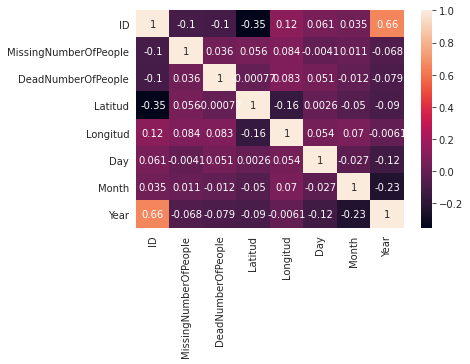

In [190]:
sns.heatmap(immigrants.corr(), annot=True);

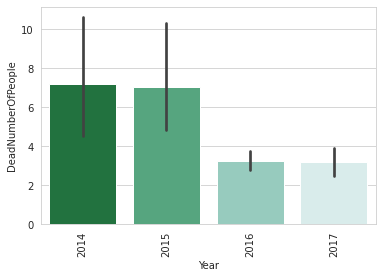

In [191]:
sns.set_color_codes("bright")
sns.barplot(x="Year", y="DeadNumberOfPeople", data=immigrants,
            label="Year Suicides", palette="BuGn_r")
plt.xticks(rotation=90);

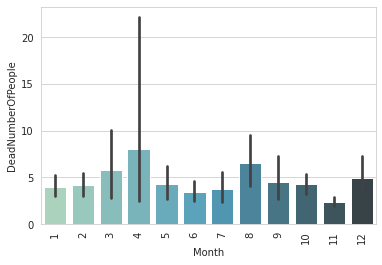

In [192]:
sns.set_color_codes("bright")
sns.barplot(x="Month", y="DeadNumberOfPeople", data=immigrants,
            label="Year Suicides", palette="GnBu_d")
plt.xticks(rotation=90);

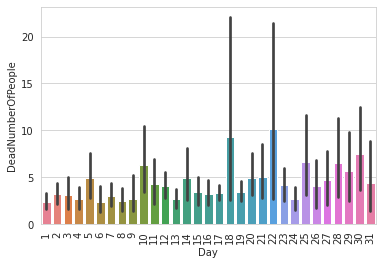

In [193]:
sns.set_color_codes("muted")
sns.barplot(x="Day", y="DeadNumberOfPeople", data=immigrants,
            label="Year Suicides", palette='husl')
plt.xticks(rotation=90);

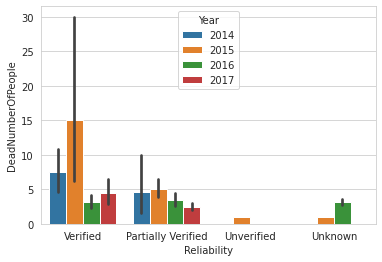

In [194]:
sns.barplot(x='Reliability', y='DeadNumberOfPeople', hue='Year', data=immigrants);

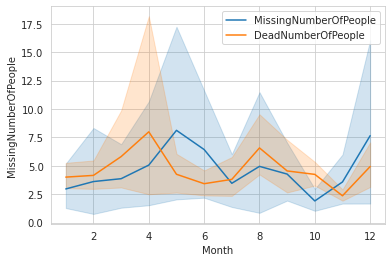

In [195]:
sns.lineplot(x='Month', y='MissingNumberOfPeople', data=immigrants)
sns.lineplot(x='Month', y='DeadNumberOfPeople', data=immigrants)

_ = plt.legend(['MissingNumberOfPeople', 'DeadNumberOfPeople'])

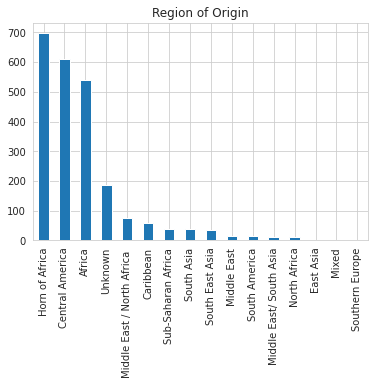

In [196]:
immigrants['RegionOfOrigin'].value_counts().plot(kind = "bar", title = "Region of Origin");

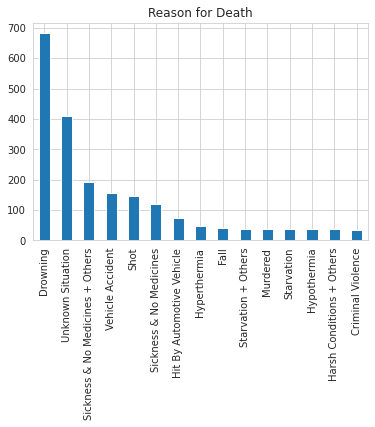

In [197]:
immigrants['CauseOfDeath'].value_counts().head(15).plot(kind = "bar", title = "Reason for Death");

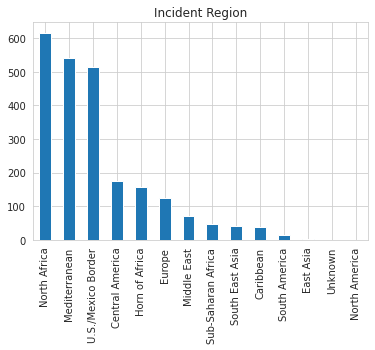

In [198]:
immigrants['IncidentRegion'].value_counts().plot(kind = "bar", title = "Incident Region");

In [199]:
immigrants.groupby('RegionOfOrigin')['DeadNumberOfPeople'].sum().to_frame()

,DeadNumberOfPeople
RegionOfOrigin,
Africa,4699
Caribbean,139
Central America,1405
East Asia,7
Horn of Africa,2366
Middle East,28
Middle East / North Africa,218
Middle East/ South Asia,29
Mixed,67


## Feature Engineering

### Label Encoding

In [200]:
immigrants.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud,Day,Month,Year
0,1,Drowning,Africa,Iraq,1,1,Mediterranean,2015-05-11,IOM Greece,Verified,36.89150,27.287700,11,5,2015
1,3,Fall,Central America,Honduras,0,1,Central America,2015-03-11,La Jornada,Partially Verified,15.95640,-93.663100,11,3,2015
2,4,Drowning,Africa,Unknown,0,1,Mediterranean,2015-03-11,Hellenic Coast Guard,Verified,36.50439,27.363253,11,3,2015
3,6,Drowning,Africa,Unknown,6,4,Mediterranean,2015-01-11,Reuters,Partially Verified,37.28560,27.086600,11,1,2015
4,7,Vehicle Accident,South East Asia,Cambodia,0,4,South East Asia,2015-01-11,Phnom Penh Post,Partially Verified,13.36110,100.985000,11,1,2015


In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [202]:
#Get Label Encoder variables per categorical variables in the dataset
immigrants_rates = immigrants
immigrants_rates['CauseOfDeath'] = le.fit_transform(immigrants.CauseOfDeath)
immigrants_rates['RegionOfOrigin'] = le.fit_transform(immigrants.RegionOfOrigin)
immigrants_rates['Nationality'] = le.fit_transform(immigrants.Nationality)
immigrants_rates['IncidentRegion'] = le.fit_transform(immigrants.IncidentRegion)
immigrants_rates['Source'] = le.fit_transform(immigrants.Source)
immigrants_rates['Reliability'] = le.fit_transform(immigrants.Reliability)
immigrants_rates.head()

,ID,CauseOfDeath,RegionOfOrigin,Nationality,MissingNumberOfPeople,DeadNumberOfPeople,IncidentRegion,Date,Source,Reliability,Latitud,Longitud,Day,Month,Year
0,1,14,0,67,1,1,5,2015-05-11,187,3,36.89150,27.287700,11,5,2015
1,3,22,2,60,0,1,1,2015-03-11,235,0,15.95640,-93.663100,11,3,2015
2,4,14,0,123,0,1,5,2015-03-11,165,3,36.50439,27.363253,11,3,2015
3,6,14,0,123,6,4,5,2015-01-11,380,0,37.28560,27.086600,11,1,2015
4,7,54,12,17,0,4,10,2015-01-11,340,0,13.36110,100.985000,11,1,2015


In [203]:
immigrants_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2419
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2341 non-null   int64         
 1   CauseOfDeath           2341 non-null   int64         
 2   RegionOfOrigin         2341 non-null   int64         
 3   Nationality            2341 non-null   int64         
 4   MissingNumberOfPeople  2341 non-null   int64         
 5   DeadNumberOfPeople     2341 non-null   int64         
 6   IncidentRegion         2341 non-null   int64         
 7   Date                   2341 non-null   datetime64[ns]
 8   Source                 2341 non-null   int64         
 9   Reliability            2341 non-null   int64         
 10  Latitud                2341 non-null   float64       
 11  Longitud               2341 non-null   float64       
 12  Day                    2341 non-null   int64         
 13  Mon

## Missing Migrants classification with LightGBM - SHAP

In [204]:
# pip install shap

In [205]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Light GBM is a gradient boosting framework that uses tree based learning algorithm
import shap

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [206]:
X = immigrants_rates[['CauseOfDeath', 'RegionOfOrigin', 'Nationality',
       'MissingNumberOfPeople', 'DeadNumberOfPeople', 'IncidentRegion', 
       'Source', 'Latitud', 'Longitud', 'Day', 'Month', 'Year']]
y = immigrants_rates[[ 'Reliability']]

# create a train/test split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state=7)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(1872, 12) (1872, 1)
(469, 12) (469, 1)


In [207]:
d_train = lgb.Dataset(train_x, label=train_y)
d_test = lgb.Dataset(test_x, label=test_y)

### Train the model

In [208]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[335]	valid_0's binary_logloss: 0.319651


### Explain predictions

In [209]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#### Visualize a single prediction

In [210]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

TypeError: ignored

#### Visualize many predictions

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])

#### SHAP Summary Plot

In [ ]:
shap.summary_plot(shap_values, X)